# Getting data from COCA corpus

In [1]:
import pandas as pd
import zipfile
import re
import os
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
# set filepath
COCA = "/Users/rachelker/Documents/UChic MSCAPP/Curriculum/2019-20 Winter/Computational Content Analysis/Project/Data/Davies Corpora/COCA/"
COCA

'/Users/rachelker/Documents/UChic MSCAPP/Curriculum/2019-20 Winter/Computational Content Analysis/Project/Data/Davies Corpora/COCA/'

## Getting texts

In [3]:
def get_data(corpus, topic_filter):    
    # get all text
    data = load_corpus(corpus)    
    all_news = []
    [all_news.extend(data[k]) for k in data.keys()]
        
    # load into dataframe
    df = pd.DataFrame(all_news, columns=['text'])
    df['text'] = df.apply(lambda x: x['text'].decode('utf-8', errors='ignore'), axis=1) 
    df = df[df['text']!='\r\n']
    df = df[df['text'].str.contains(topic_filter)]

    # get text_ids
    df['text_id'] = df.apply(lambda x: get_textid(x), axis=1)
    df.set_index('text_id', inplace=True)
    return df

def get_textid(row):
        text = row['text']
        text_id = re.search('(?<=##|@@)[0-9]+', text)
        return str(text_id.group(0))
    
def load_corpus(corpus):
    data = {}
    for zip_ in os.listdir(corpus):
        if "zip" in zip_ and "sources" not in zip_:
            try:
                zfile = zipfile.ZipFile(corpus + zip_)
                for file in zfile.namelist():
                    data[file] = []
                    with zfile.open(file) as f:
                        for line in f:
                            data[file].append(line)
            except:
                print(zip_, " ")
                continue

    return data

In [4]:
df = get_data(COCA, '')
# total of 219,379 articles

In [5]:
refugee_df = get_data(COCA, 'refugee')

In [6]:
refugee_df
# 5,258

,text
text_id,
2018849,"##2018849 <p> "" Bums . "" That 's what Radio Ha..."
2018850,##2018850 Section : INVESTING <p> Expanding pe...
2019006,##2019006 Section : CLOTHES THAT WORK American...
2019061,##2019061 Section : MOVEMENTS From socialist t...
2019063,##2019063 <p> INSIDE A DUSTY CEMENT-BLOCK HOUS...
...,...
4162833,@@4162833 O o . Here I am with this American b...
4162845,"@@4162845 ATRICK IS FOURTEEN , this is earth ,..."
4162876,@@4162876 Any future lists of colorful Texas c...


## Getting metadata

In [7]:
def get_sources():
    cols = ['text_id', 'word_count', 'year', 'genre', 'subgen', 'source', 'title', 'publication_info']

    zfile = zipfile.ZipFile(COCA + "sources.zip")
    source = []
    for file in zfile.namelist():
        with zfile.open(file) as f:
            i=0
            for line in f:
                if i<=1:
                    # skip first 2 lines
                    print(line)
                    i+=1
                    continue
               
                line = line.decode('utf-8', errors='ignore').split("\t", 7)
                if len(line)>4:
                    source.append(line)
    
    sources_df = pd.DataFrame(source, columns=cols)
    sources_df.set_index('text_id', inplace=True)
    return sources_df

In [8]:
sources_df = get_sources()

b'textID\t#words\tyear\tgenre\tsubgen\tsource\ttitle\t\t(publication info, for non-spoken)\r\n'
b'----\t----\t----\t----\t----\t----\t----\r\n'


In [9]:
sources_df
#248,948 sources

,word_count,year,genre,subgen,source,title,publication_info
text_id,,,,,,,
221118,8101,1990,SPOK,101,ABC_20/20,Is He a Killer?; Who Will Love My Pet?; The Tw...,None
221119,8358,1990,SPOK,101,ABC_20/20,Golden Years Behind Bars; The Joker; Goodbye W...,None
221120,7824,1990,SPOK,101,ABC_20/20,Too Old Too Soon; Danger on the Half Shell; Mi...,None
221121,8559,1990,SPOK,101,ABC_20/20,Chicken at Any Price?; The Daytop Solution; Su...,None
221122,8199,1990,SPOK,101,ABC_20/20,Children of Terror; Against All Odds; Buck Fev...,None
...,...,...,...,...,...,...,...
4174366,993,2017,ACAD,NULL,Inside Higher Ed,Study details tool to help professors measure ...,None
4174367,2393,2017,ACAD,NULL,Diverse: Issues in Higher Education,Experts: Colleges' Media Messages Need Diverse...,None
4174368,1034,2017,ACAD,NULL,Inside Higher Ed,Another Year on the Academic Job Market\r\n,None


## Merge text and meta data

In [51]:
# only take articles that have both text and metadata
refugee_merged_df = refugee_df.join(sources_df, how='inner')
all_merged_df = df.join(sources_df, how='inner')

refugee_merged_df['year'] = refugee_merged_df['year'].apply(int)
refugee_merged_df['word_count'] = refugee_merged_df['word_count'].apply(int)
all_merged_df['year'] = all_merged_df['year'].apply(int)
all_merged_df['word_count'] = all_merged_df['word_count'].apply(int)

In [52]:
print(len(refugee_merged_df), len(all_merged_df))

5257 219337


In [53]:
refugee_merged_df
# about 200 a year

,text,word_count,year,genre,subgen,source,title,publication_info
text_id,,,,,,,,
2018849,"##2018849 <p> "" Bums . "" That 's what Radio Ha...",2950,1990,MAG,124,Money,This is the land of opportunity.,"Vol. 19 Issue 8, p98, 8p, 1 chart, 3c, 4bw\r\n"
2018850,##2018850 Section : INVESTING <p> Expanding pe...,2514,1990,MAG,124,Money,Betting on regional booms.,"Vol. 19 Issue 8, p110, 5p, 1 chart, 2c\r\n"
2019006,##2019006 Section : CLOTHES THAT WORK American...,1667,1990,MAG,130,MotherEarth,The evolution of jeans.,"p60, 4p, 5c, 2bw\r\n"
2019061,##2019061 Section : MOVEMENTS From socialist t...,1754,1990,MAG,123,MotherJones,Serve the people.,"Vol. 15 Issue 5, p18, 3p, 1 illustration\r\n"
2019063,##2019063 <p> INSIDE A DUSTY CEMENT-BLOCK HOUS...,6032,1990,MAG,123,MotherJones,No road to Tahuanti.,"Vol. 15 Issue 5, p36, 11p, 8bw\r\n"
...,...,...,...,...,...,...,...,...
4162833,@@4162833 O o . Here I am with this American b...,2952,2013,FIC,115,AntiochRev,Beta.,"Spring2013, Vol. 71 Issue 2, p309-316. 8p. \r\n"
4162845,"@@4162845 ATRICK IS FOURTEEN , this is earth ,...",6792,2013,FIC,115,MassachRev,Godzilla versus the Smog Monster.,"Spring2013, Vol. 54 Issue 1, p51-67. 17p. \r\n"
4162876,@@4162876 Any future lists of colorful Texas c...,7553,2013,FIC,116,FantasySciFi,A Haunting in Love City.,"Jan/Feb2013, Vol. 124 Issue 1/2, p147-165. 19..."


In [54]:
refugee_merged_df.groupby('genre').size()

genre
ACAD     883
FIC      540
MAG      957
NEWS    1601
SPOK    1276
dtype: int64

In [55]:
refugee_merged_df.groupby('year').size()/all_merged_df.groupby('year').size()*100

year
1990    3.703704
1991    4.491154
1992    3.172805
1993    3.532984
1994    3.808741
1995    2.686932
1996    2.799228
1997    2.052452
1998    2.346773
1999    2.805562
2000    2.345005
2001    2.379841
2002    2.793356
2003    1.974021
2004    1.943729
2005    2.069426
2006    2.374986
2007    2.033599
2008    1.751131
2009    1.794380
2010    1.496840
2011    1.708305
2012    1.601478
2013    1.764149
2014    2.154928
2015    2.546902
dtype: float64

## Data cleaning

In [98]:
data = refugee_merged_df.reset_index()

In [57]:
def clean_title(row):
    title = row['title']
    remove = ['\r','\n','^']
    for string in remove:
        title = title.replace(string,'')
    return title

def clean_text(row):
    text = row['text']
    text_id = row['text_id']
    remove = ['\r','\n','<p>','@','##{}'.format(text_id)]
    for string in remove:
        text = text.replace(string,'')
    return text.lower()

In [58]:
data['title'] = data.apply(lambda x: clean_title(x), axis=1)
data['text'] = data.apply(lambda x: clean_text(x), axis=1)

In [59]:
data.to_csv('data/refugee_coca_all.csv', index=False)

In [60]:
data = pd.read_csv('data/refugee_coca_all.csv')

## Summary of Sample

In [61]:
genres = data['genre'].unique()
genres

array(['MAG', 'ACAD', 'SPOK', 'FIC', 'NEWS'], dtype=object)

In [62]:
years = sorted(data['year'].unique())
years

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

### Number / percentage of docs

Text(0.5, 1.0, "Number of documents with 'refugee' in the COCA corpus by year")

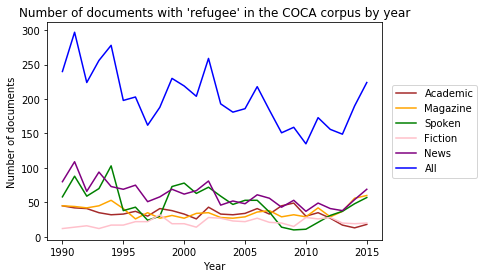

In [63]:
# Number of articles over time by genre
acad, = plt.plot(years, data[data['genre']=='ACAD'].groupby('year').size(), label='Academic')
mag, = plt.plot(years, data[data['genre']=='MAG'].groupby('year').size(), label='Magazine')
spok, = plt.plot(years, data[data['genre']=='SPOK'].groupby('year').size(), label='Spoken')
fic, = plt.plot(years, data[data['genre']=='FIC'].groupby('year').size(), label='Fiction')
news, = plt.plot(years, data[data['genre']=='NEWS'].groupby(['year']).size(), label='News')
all_, = plt.plot(years,data.groupby('year').size(), label="All")

colors = ["brown","orange","green","pink","purple","blue"]
for i in range(len(plt.gca().get_lines())):
    plt.gca().get_lines()[i].set_color(colors[i])
    
plt.legend(handles=[acad, mag, spok, fic, news, all_], loc="center right", bbox_to_anchor=(1.3, .5), ncol=1)


plt.ylabel('Number of documents')
plt.xlabel('Year')
plt.title("Number of documents with 'refugee' in the COCA corpus by year")

Text(0.5, 1.0, "Percentage of documents with 'refugee' in the COCA corpus by year")

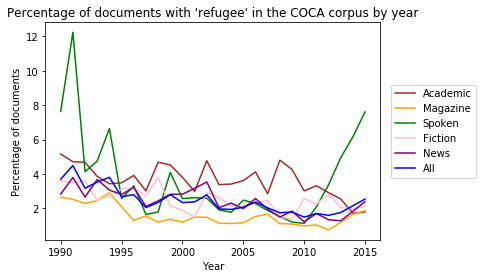

In [66]:
# Percentage of articles over time by genre

acad, = plt.plot(years, data[data['genre']=='ACAD'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='ACAD'].groupby('year').size()*100, label='Academic')
mag, = plt.plot(years, data[data['genre']=='MAG'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='MAG'].groupby('year').size()*100, label='Magazine')
spok, = plt.plot(years, data[data['genre']=='SPOK'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='SPOK'].groupby('year').size()*100, label='Spoken')
fic, = plt.plot(years, data[data['genre']=='FIC'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='FIC'].groupby('year').size()*100, label='Fiction')
news, = plt.plot(years, data[data['genre']=='NEWS'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='NEWS'].groupby('year').size()*100, label='News')
all_, = plt.plot(years, data.groupby('year').size()/all_merged_df.groupby('year').size()*100, label="All")

colors = ["brown","orange","green","pink","purple","blue"]
for i in range(len(plt.gca().get_lines())):
    plt.gca().get_lines()[i].set_color(colors[i])
    
plt.legend(handles=[acad, mag, spok, fic, news, all_], loc="center right", bbox_to_anchor=(1.3, .5), ncol=1)

#plt.vlines('2006',0,700, linestyles='dashed')

plt.ylabel('Percentage of documents')
plt.xlabel('Year')
plt.title("Percentage of documents with 'refugee' in the COCA corpus by year")

### Average word count

In [67]:
# Average Word Count
data['word_count'].sum() / len(data)

4409.828989918205

In [68]:
print(data['word_count'].min(), data['word_count'].max())

49 107449


In [71]:
def get_word_count(data):
    word_count = []
    for yr in years:
        yearly = data[data['year']==yr]
        word_count.append(yearly['word_count'].sum() / len(yearly))
    return word_count

Text(0.5, 1.0, "Average word count of documents with 'refugee' in the COCA corpus by year")

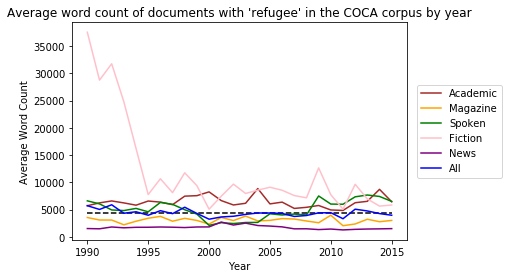

In [77]:
acad, = plt.plot(years, get_word_count(data[data['genre']=='ACAD']), label='Academic')
mag, = plt.plot(years, get_word_count(data[data['genre']=='MAG']), label='Magazine')
spok, = plt.plot(years, get_word_count(data[data['genre']=='SPOK']), label='Spoken')
fic, = plt.plot(years, get_word_count(data[data['genre']=='FIC']), label='Fiction')
news, = plt.plot(years, get_word_count(data[data['genre']=='NEWS']), label='News')
all_, = plt.plot(years, get_word_count(data), label='All')

colors = ["brown","orange","green","pink","purple","blue"]
for i in range(6):
    plt.gca().get_lines()[i].set_color(colors[i])
    
plt.legend(handles=[acad, mag, spok, fic, news, all_], loc="center right", bbox_to_anchor=(1.3, .5), ncol=1)

# plot average of sample
plt.hlines(data['word_count'].sum() / len(data), 1990, 2015, linestyles='dashed')

plt.ylabel('Average Word Count')
plt.xlabel('Year')
plt.title("Average word count of documents with 'refugee' in the COCA corpus by year")

### Unique sources

In [73]:
# Number of unique sources over time
def get_unique_source(data):
    unique_source = []
    for yr in years:
        yearly = data[data['year']==yr]
        unique_source.append(len(yearly['source'].unique()))
    return unique_source

In [74]:
len(data['source'].unique())

606

In [75]:
years[-1]

2015

Text(0.5, 1.0, "Number of unique sources with 'refugee' in the COCA corpus by year")

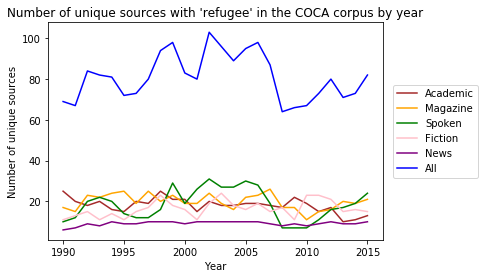

In [78]:
acad, = plt.plot(years, get_unique_source(data[data['genre']=='ACAD']), label='Academic')
mag, = plt.plot(years, get_unique_source(data[data['genre']=='MAG']), label='Magazine')
spok, = plt.plot(years, get_unique_source(data[data['genre']=='SPOK']), label='Spoken')
fic, = plt.plot(years, get_unique_source(data[data['genre']=='FIC']), label='Fiction')
news, = plt.plot(years, get_unique_source(data[data['genre']=='NEWS']), label='News')
all_, = plt.plot(years, get_unique_source(data), label='All')

colors = ["brown","orange","green","pink","purple","blue"]
for i in range(6):
    plt.gca().get_lines()[i].set_color(colors[i])
    
plt.legend(handles=[acad, mag, spok, fic, news, all_], loc="center right", bbox_to_anchor=(1.3, .5), ncol=1)

plt.ylabel('Number of unique sources')
plt.xlabel('Year')
plt.title("Number of unique sources with 'refugee' in the COCA corpus by year")

## Getting only relevant genres for analysis

In [99]:
data = data[(data['genre']=='SPOK') | (data['genre']=='NEWS') | (data['genre']=='MAG')]

In [101]:
data.genre.unique()

array(['MAG', 'SPOK', 'NEWS'], dtype=object)

In [103]:
len(data)

3834

In [102]:
data.to_csv('data/refugee_coca_foranalysis.csv', index=False)